In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [126]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\product-wise-declined-businesstechnical-transactions.csv")

In [127]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [128]:
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['year'] = df['year'].astype(str)
df = df.sort_values(by='date')

In [129]:
df.head()

,id,date,product,issuer_bank,total_volume,approved_transaction_volume,business_decline_transactions,technical_decline_transactions,month,year
0,0,2021-08-01,NFS,State Bank of India,109.85,83.91,14.68,0.44,August,2021
72,72,2021-08-01,AEPS,Rajasthan Marudhara Gramin Bank,2.48,78.40,13.55,4.50,August,2021
71,71,2021-08-01,AEPS,Bangiya Gramin Vikash Bank,2.77,74.46,12.76,10.03,August,2021
70,70,2021-08-01,AEPS,Bank of Maharashtra,2.84,80.37,12.26,3.41,August,2021
69,69,2021-08-01,AEPS,Prathma UP Gramin Bank erstwhile Sarva UP Gram...,3.07,80.29,12.57,3.47,August,2021


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2300 entries, 0 to 2299
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2300 non-null   int64         
 1   date                            2300 non-null   datetime64[ns]
 2   product                         2300 non-null   object        
 3   issuer_bank                     2300 non-null   object        
 4   total_volume                    2300 non-null   float64       
 5   approved_transaction_volume     2300 non-null   float64       
 6   business_decline_transactions   2300 non-null   float64       
 7   technical_decline_transactions  2300 non-null   float64       
 8   month                           2300 non-null   object        
 9   year                            2300 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 197.7+ KB

In [131]:
df.describe()

,id,date,total_volume,approved_transaction_volume,business_decline_transactions,technical_decline_transactions
count,2300.000000,2300,2300.000000,2300.000000,2300.00000,2300.000000
mean,1149.500000,2022-07-03 01:02:36.521739264,7.362713,78.059561,16.69783,4.012609
min,0.000000,2021-08-01 00:00:00,0.100000,12.910000,0.67000,0.020000
25%,574.750000,2022-01-01 00:00:00,0.940000,74.677500,12.59750,0.837500
50%,1149.500000,2022-07-01 00:00:00,2.050000,80.340000,15.34000,2.120000
75%,1724.250000,2023-01-01 00:00:00,7.245000,83.952500,18.81000,4.680000
max,2299.000000,2023-07-01 00:00:00,116.480000,94.660000,61.18000,83.680000
std,664.097131,NaN,14.605816,8.859087,6.66592,5.939438


In [132]:
df['total_volume'].skew()

4.571061048608946

In [133]:
# handling outliers by capping method (column : total_volume)
percentile25 = df['total_volume'].quantile(0.25)
percentile75 = df['total_volume'].quantile(0.75)
iqr = percentile75 - percentile25
upperlimit = percentile75 + 1.5*iqr
lowerlimit = percentile25 - 1.5*iqr
df['total_volume'] = np.where(
    df['total_volume'] > upperlimit,
    upperlimit,
    np.where(
    df['total_volume'] < lowerlimit,
    lowerlimit,
         df['total_volume']
    )
)
df['total_volume'].skew()

1.24437381453836

In [134]:
# add constant for non negative values
shift_constant = abs(df['total_volume'].min()) + 1
shifted_data = df['total_volume'] + shift_constant

# Apply log transformation
df['total_volume'] = np.log(shifted_data)

In [135]:
df['total_volume'].skew()

0.6068804910433298

In [136]:
df['approved_transaction_volume'].skew()

-1.836323184272837

In [137]:
# handling outliers by capping method (column : approved_transaction_volume)
percentile25 = df['approved_transaction_volume'].quantile(0.25)
percentile75 = df['approved_transaction_volume'].quantile(0.75)
iqr = percentile75 - percentile25
upperlimit = percentile75 + 1.5*iqr
lowerlimit = percentile25 - 1.5*iqr
df['approved_transaction_volume'] = np.where(
    df['approved_transaction_volume'] > upperlimit,
    upperlimit,
    np.where(
    df['approved_transaction_volume'] < lowerlimit,
    lowerlimit,
         df['approved_transaction_volume']
    )
)

In [138]:
df['approved_transaction_volume'] = np.square(df['approved_transaction_volume'])

In [139]:
df['approved_transaction_volume'].skew()

-0.6835705228886861

In [140]:
df['business_decline_transactions'].skew()

2.0895616841851674

In [141]:
# handling outliers by capping method (column : business_decline_transactions)
percentile25 = df['business_decline_transactions'].quantile(0.25)
percentile75 = df['business_decline_transactions'].quantile(0.75)
iqr = percentile75 - percentile25
upperlimit = percentile75 + 1.5*iqr
lowerlimit = percentile25 - 1.5*iqr
df['business_decline_transactions'] = np.where(
    df['business_decline_transactions'] > upperlimit,
    upperlimit,
    np.where(
    df['business_decline_transactions'] < lowerlimit,
    lowerlimit,
         df['business_decline_transactions']
    )
)

In [142]:
df['business_decline_transactions'].skew()

0.7147781048368826

In [143]:
df['technical_decline_transactions'].skew()

4.38424852254424

In [144]:
# handling outliers by capping method (column : technical_decline_transactions)
percentile25 = df['technical_decline_transactions'].quantile(0.25)
percentile75 = df['technical_decline_transactions'].quantile(0.75)
iqr = percentile75 - percentile25
upperlimit = percentile75 + 1.5*iqr
lowerlimit = percentile25 - 1.5*iqr
df['technical_decline_transactions'] = np.where(
    df['technical_decline_transactions'] > upperlimit,
    upperlimit,
    np.where(
    df['technical_decline_transactions'] < lowerlimit,
    lowerlimit,
         df['technical_decline_transactions']
    )
)

In [145]:
# add constant to avoid negative values
shift_constant = abs(df['technical_decline_transactions'].min()) + 1
shifted_data = df['technical_decline_transactions'] + shift_constant

# Apply log transformation
df['technical_decline_transactions'] = np.log(shifted_data)
df['technical_decline_transactions'].skew()

0.26686400119357256

Text(0.5, 1.0, 'approved transaction by Product')

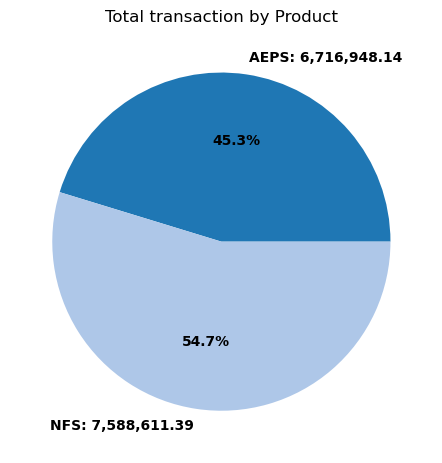

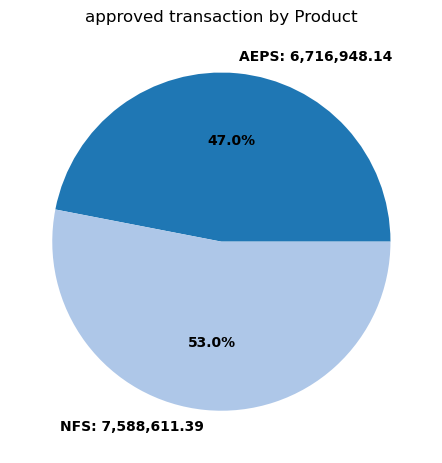

In [146]:
# group total_volume , approved_transaction_volume columns  by product 
totaltransaction_data = df.groupby('product').agg({'total_volume' :'sum','approved_transaction_volume': 'sum'})
# Pie chart for total transactions by product
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
totalvolume_labels = [f"{product}: {totaltransaction:,.2f}" for product, totaltransaction in zip(totaltransaction_data.index, totaltransaction_data['approved_transaction_volume'])]
plt.pie(totaltransaction_data['total_volume'], labels=totalvolume_labels, autopct='%1.1f%%', colors=plt.cm.tab20.colors, textprops={'fontweight': 'bold'})
plt.title('Total transaction by Product')

# Pie chart for approved transactions by product
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
approvedvolume_labels = [f"{product}: {approvedtransaction:,.2f}" for product, approvedtransaction in zip(totaltransaction_data.index, totaltransaction_data['approved_transaction_volume'])]
plt.pie(totaltransaction_data['approved_transaction_volume'], labels=approvedvolume_labels, autopct='%1.1f%%', colors=plt.cm.tab20.colors, textprops={'fontweight': 'bold'})
plt.title('approved transaction by Product')

Text(0.5, 1.0, 'Technical decline by Product')

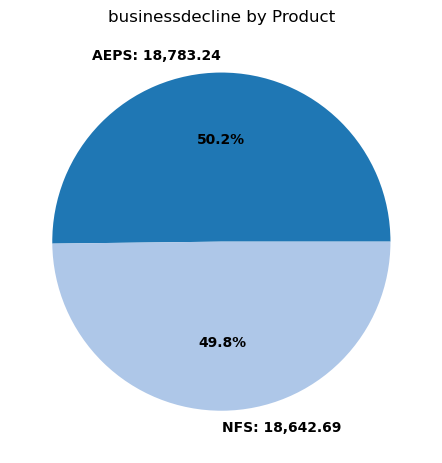

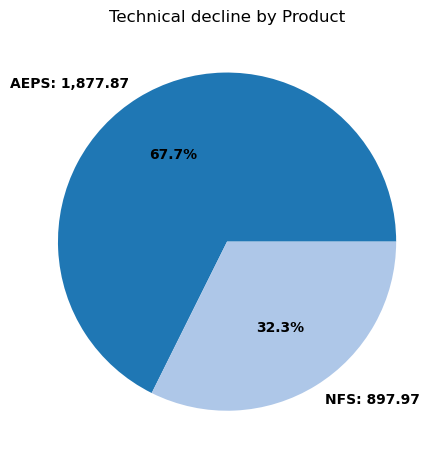

In [147]:
# group business_decline_transactions column  by product
businessdecline_data = df.groupby('product').agg({'business_decline_transactions': 'sum'})

# Pie chart for Sales by Region
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
decline_labels = [f"{product}: {businessdecline:,.2f}" for product, businessdecline in zip(businessdecline_data.index, businessdecline_data['business_decline_transactions'])]
plt.pie(businessdecline_data['business_decline_transactions'], labels=decline_labels, autopct='%1.1f%%', colors=plt.cm.tab20.colors, textprops={'fontweight': 'bold'})
plt.title('businessdecline by Product')
technicaldecline_data = df.groupby('product').agg({'technical_decline_transactions': 'sum'})

# Pie chart for Sales by Region
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
decline_labels = [f"{product}: {technicaldecline:,.2f}" for product, technicaldecline in zip(technicaldecline_data.index, technicaldecline_data['technical_decline_transactions'])]
plt.pie(technicaldecline_data['technical_decline_transactions'], labels=decline_labels, autopct='%1.1f%%', colors=plt.cm.tab20.colors, textprops={'fontweight': 'bold'})
plt.title('Technical decline by Product')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'July')])

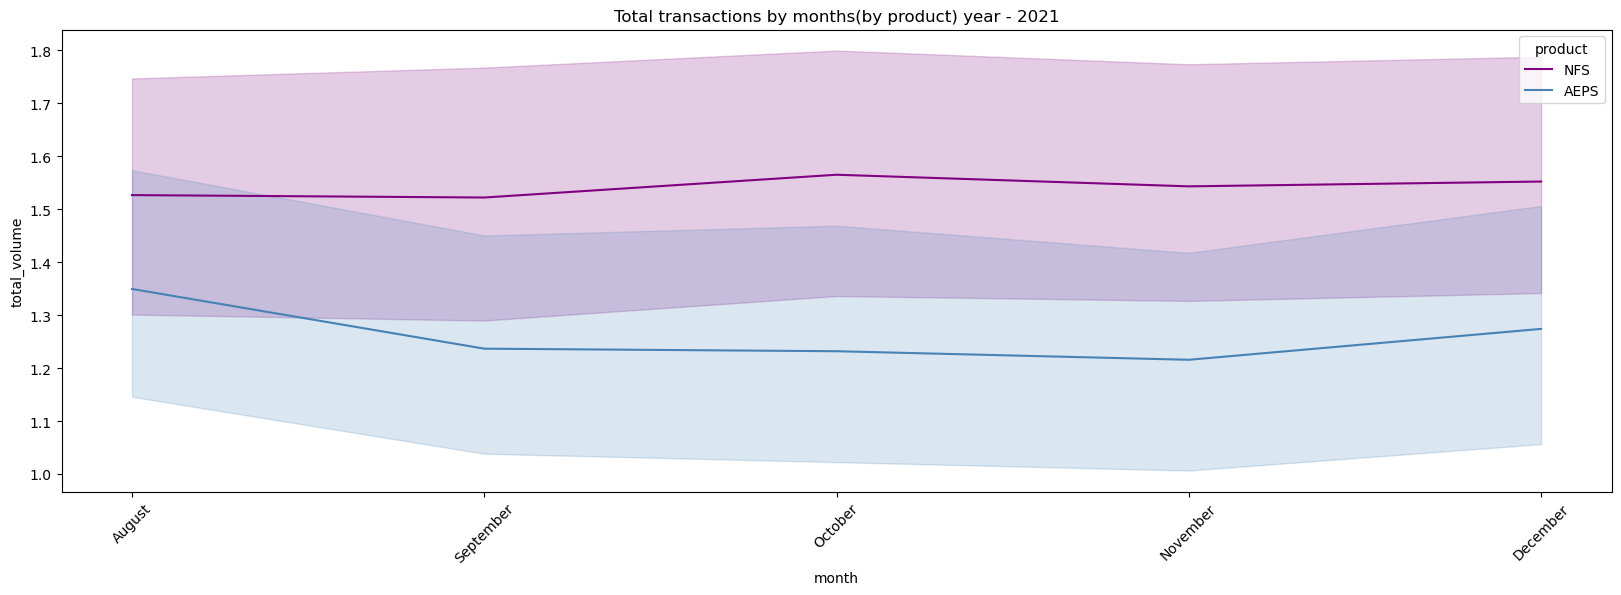

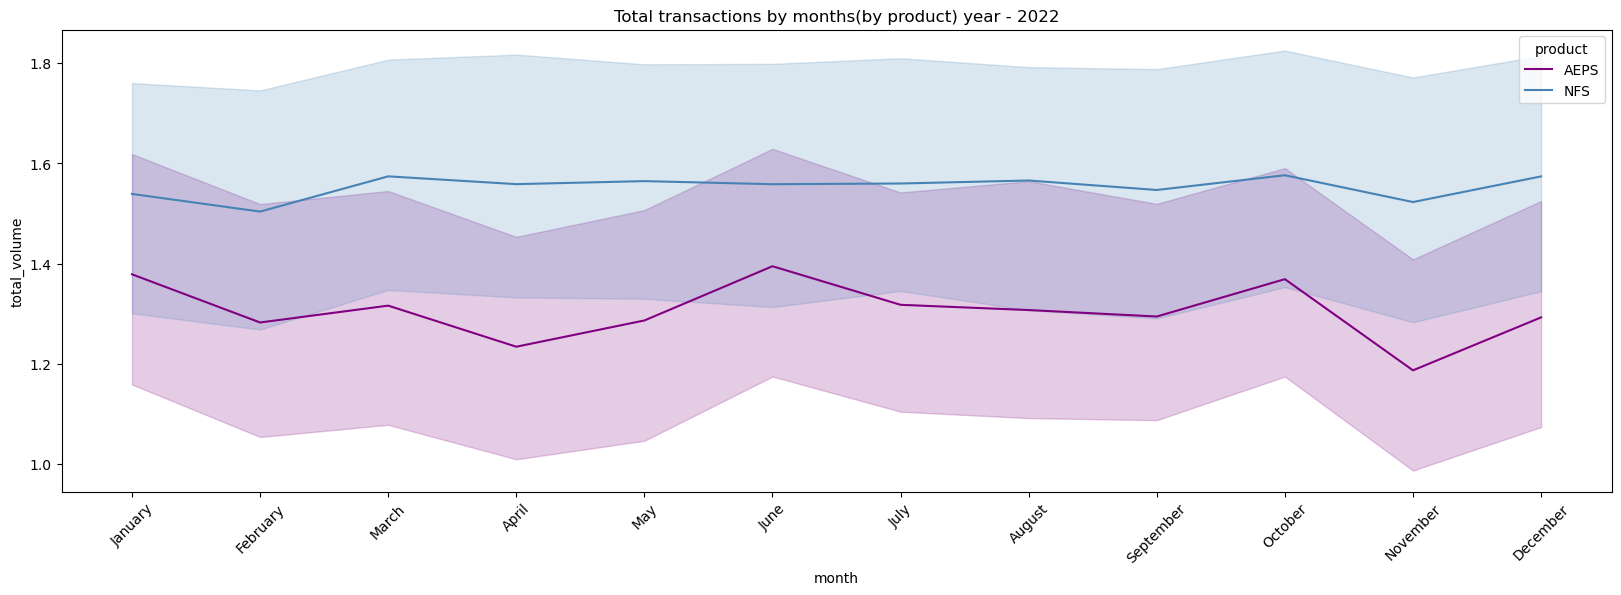

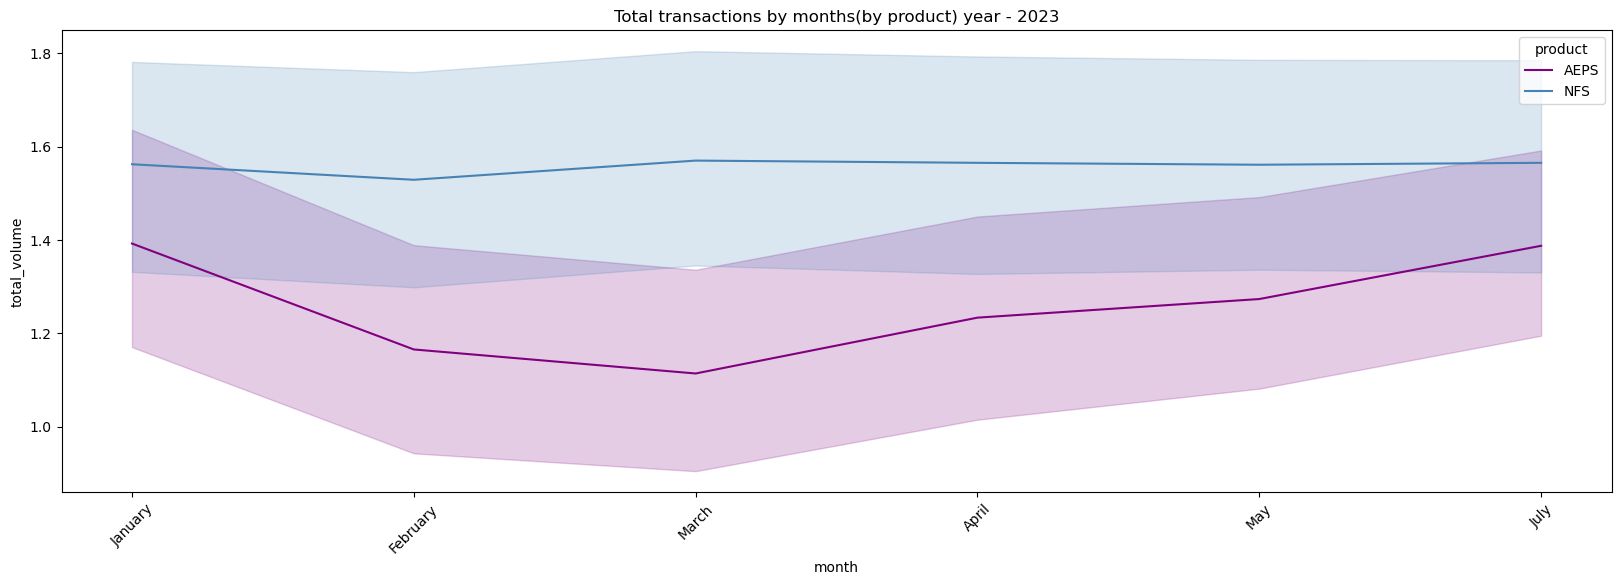

In [148]:
plt.figure(figsize = (20,6))
years_to_include = [2021]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the line chart Total transactions by months(by product) year - 2021
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['total_volume'],
    hue=df_filtered['product'],
    data=df_filtered,
    palette=['purple', 'steelblue']
)
plt.title('Total transactions by months(by product) year - 2021')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


plt.figure(figsize = (20,6))
years_to_include = [2022]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the line chart Total transactions by months(by product) year - 2022
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['total_volume'],
    hue=df_filtered['product'],
    data=df_filtered,
    palette=['purple', 'steelblue']
)
plt.title('Total transactions by months(by product) year - 2022')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.figure(figsize = (20,6))
years_to_include = [2023]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the line chart Total transactions by months(by product) year - 2023
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['total_volume'],
    hue=df_filtered['product'],
    data=df_filtered,
    palette=['purple', 'steelblue']
)
plt.title('Total transactions by months(by product) year - 2023')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'July')])

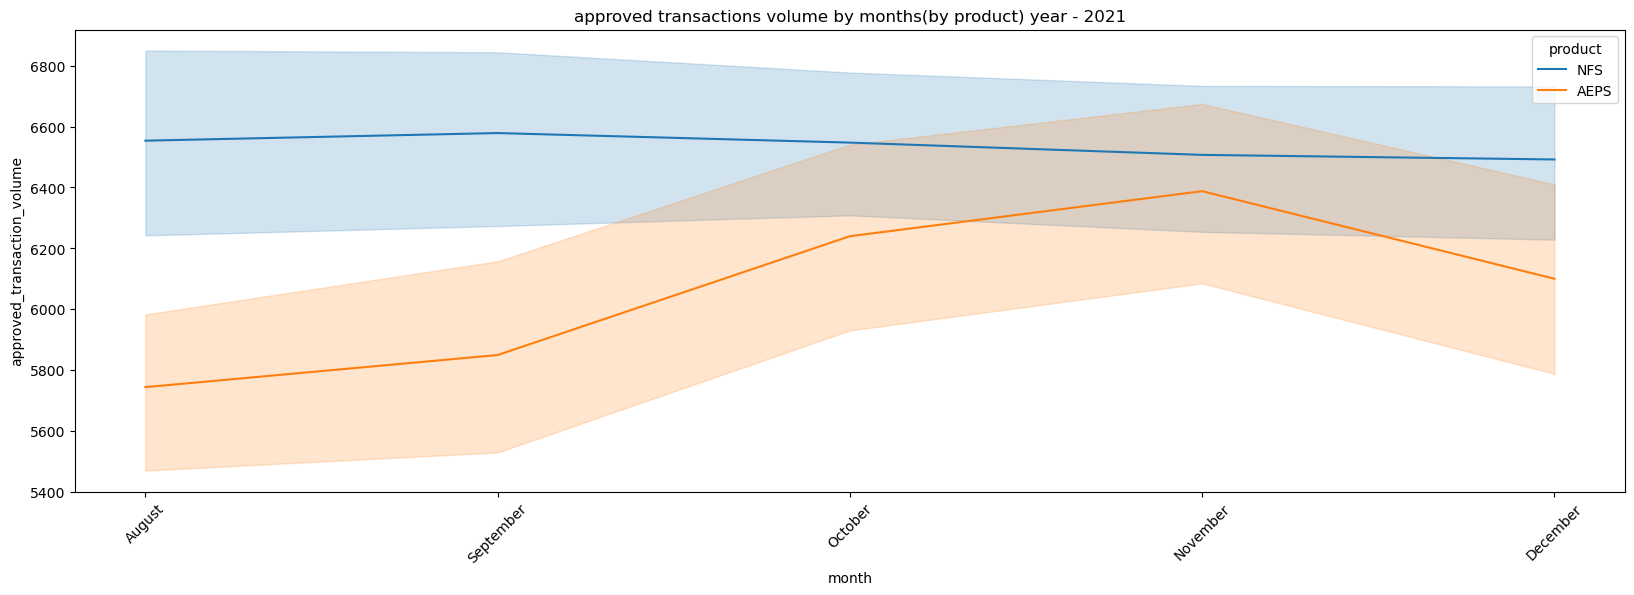

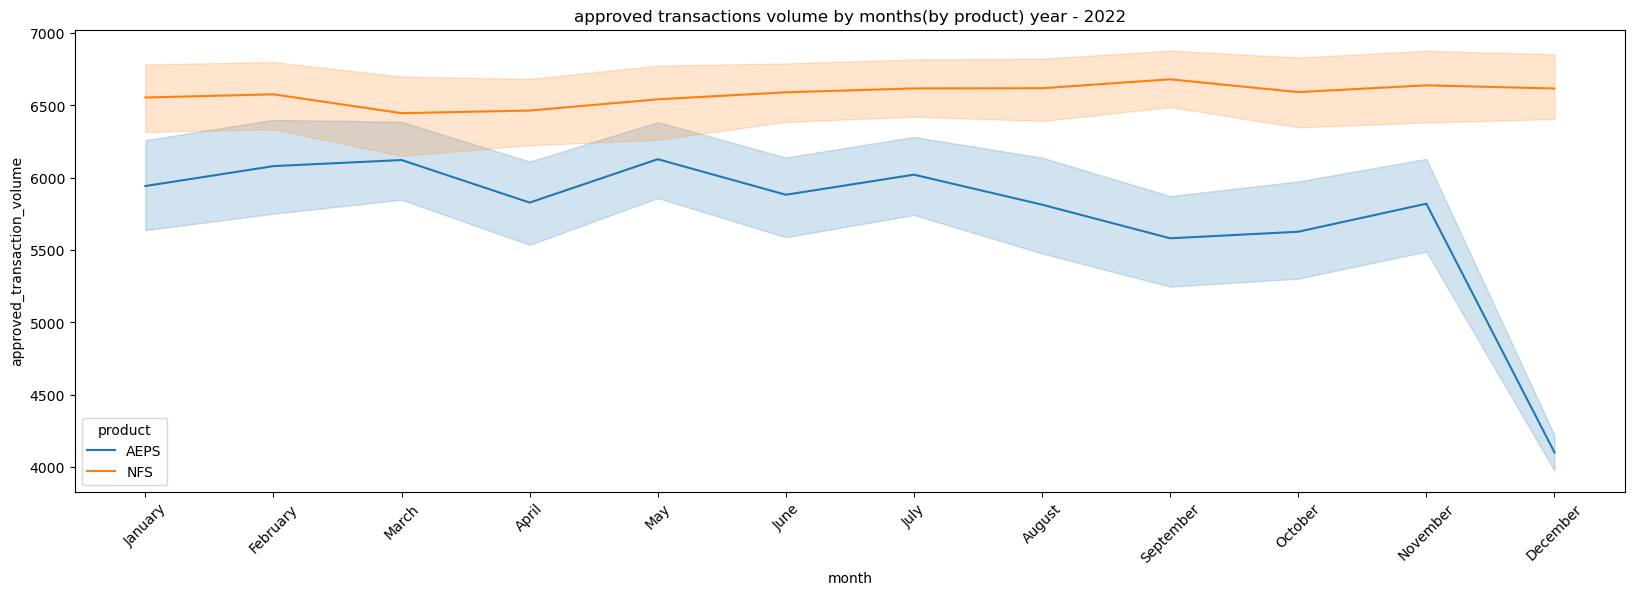

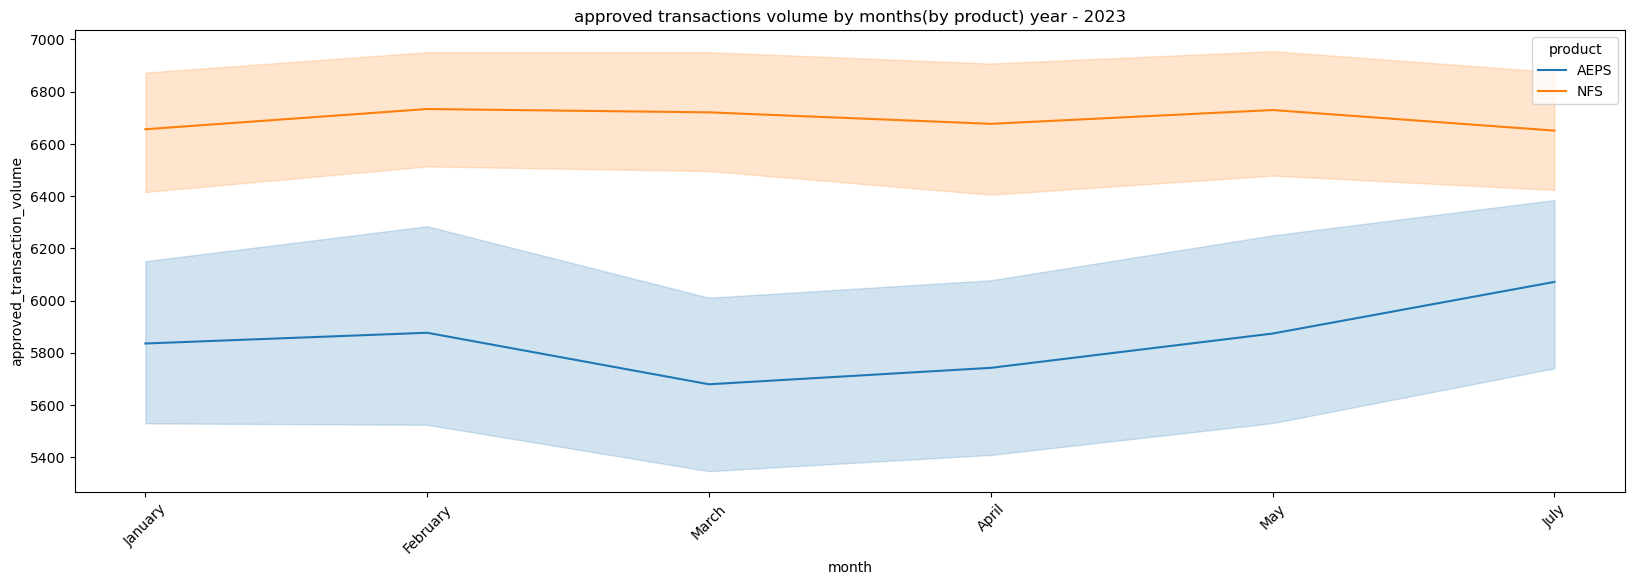

In [149]:


plt.figure(figsize = (20,6))
years_to_include = [2021]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the line chart approved  transactions volume by months(by product) year - 2021
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['approved_transaction_volume'],
    hue=df_filtered['product'],
    data=df_filtered,
    
)
plt.title('approved transactions volume by months(by product) year - 2021')
plt.xticks(rotation=45)

plt.figure(figsize = (20,6))
years_to_include = [2022]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the line chart approved  transactions volume by months(by product) year - 2021
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['approved_transaction_volume'],
    hue=df_filtered['product'],
    data=df_filtered,
    
)
plt.title('approved transactions volume by months(by product) year - 2022')
plt.xticks(rotation=45)

plt.figure(figsize = (20,6))
years_to_include = [2023]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the line chart approved  transactions volume by months(by product) year - 2023
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['approved_transaction_volume'],
    hue=df_filtered['product'],
    data=df_filtered,
    
)
plt.title('approved transactions volume by months(by product) year - 2023')
plt.xticks(rotation=45)

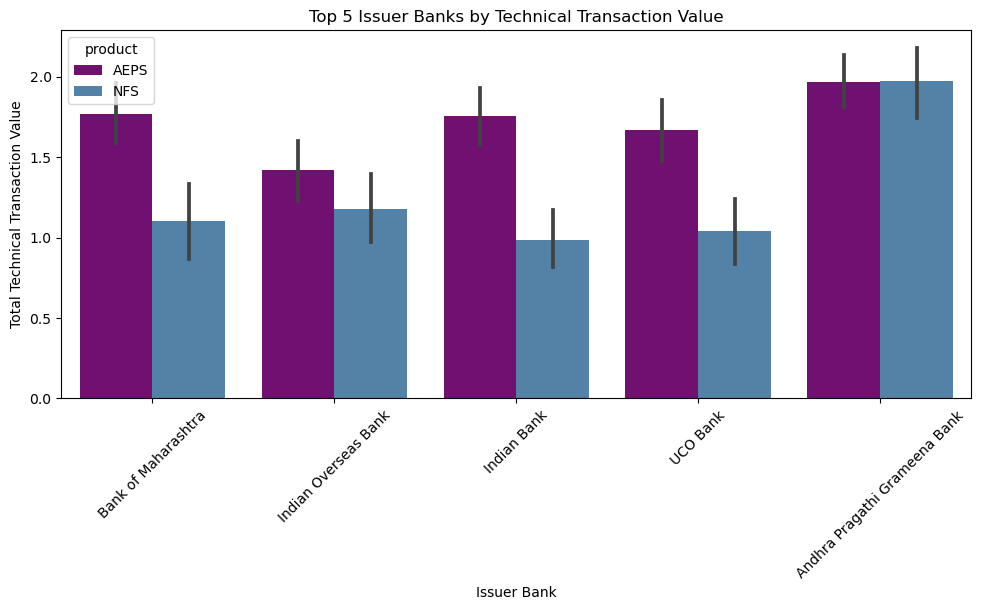

In [150]:
issuer_totals = df.groupby('issuer_bank')['technical_decline_transactions'].sum()

# Sort by value (descending) and select top 5
top_5_issuers = issuer_totals.sort_values(ascending=False).head(5).index.tolist()

# Filter data for top 5 issuers
df_filtered = df[df['issuer_bank'].isin(top_5_issuers)]

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=df_filtered['issuer_bank'], y=df_filtered['technical_decline_transactions'], hue=df_filtered['product'], data=df_filtered,
            palette=['purple', 'steelblue'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Top 5 Issuer Banks by Technical Transaction Value")
plt.xlabel("Issuer Bank")
plt.ylabel("Total Technical Transaction Value")
plt.show()

In [151]:
df.describe()

,id,date,total_volume,approved_transaction_volume,business_decline_transactions,technical_decline_transactions
count,2300.000000,2300,2300.000000,2300.000000,2300.000000,2300.000000
mean,1149.500000,2022-07-03 01:02:36.521739264,1.418352,6219.808490,16.272140,1.206887
min,0.000000,2021-08-01 00:00:00,0.182322,3692.385225,3.278750,0.039221
25%,574.750000,2022-01-01 00:00:00,0.712950,5576.729025,12.597500,0.619229
50%,1149.500000,2022-07-01 00:00:00,1.147402,6454.515600,15.340000,1.144223
75%,1724.250000,2023-01-01 00:00:00,2.121662,7048.022275,18.810000,1.740466
max,2299.000000,2023-07-01 00:00:00,2.879339,8960.515600,28.128750,2.439190
std,664.097131,NaN,0.836203,1112.982204,5.253557,0.705471


In [152]:
df.head()

,id,date,product,issuer_bank,total_volume,approved_transaction_volume,business_decline_transactions,technical_decline_transactions,month,year
0,0,2021-08-01,NFS,State Bank of India,2.879339,7040.8881,14.68,0.378436,August,2021
72,72,2021-08-01,AEPS,Rajasthan Marudhara Gramin Bank,1.275363,6146.5600,13.55,1.708378,August,2021
71,71,2021-08-01,AEPS,Bangiya Gramin Vikash Bank,1.353255,5544.2916,12.76,2.402430,August,2021
70,70,2021-08-01,AEPS,Bank of Maharashtra,1.371181,6459.3369,12.26,1.488400,August,2021
69,69,2021-08-01,AEPS,Prathma UP Gramin Bank erstwhile Sarva UP Gram...,1.427916,6446.4841,12.57,1.501853,August,2021


In [153]:
df.head()

,id,date,product,issuer_bank,total_volume,approved_transaction_volume,business_decline_transactions,technical_decline_transactions,month,year
0,0,2021-08-01,NFS,State Bank of India,2.879339,7040.8881,14.68,0.378436,August,2021
72,72,2021-08-01,AEPS,Rajasthan Marudhara Gramin Bank,1.275363,6146.5600,13.55,1.708378,August,2021
71,71,2021-08-01,AEPS,Bangiya Gramin Vikash Bank,1.353255,5544.2916,12.76,2.402430,August,2021
70,70,2021-08-01,AEPS,Bank of Maharashtra,1.371181,6459.3369,12.26,1.488400,August,2021
69,69,2021-08-01,AEPS,Prathma UP Gramin Bank erstwhile Sarva UP Gram...,1.427916,6446.4841,12.57,1.501853,August,2021


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'July')])

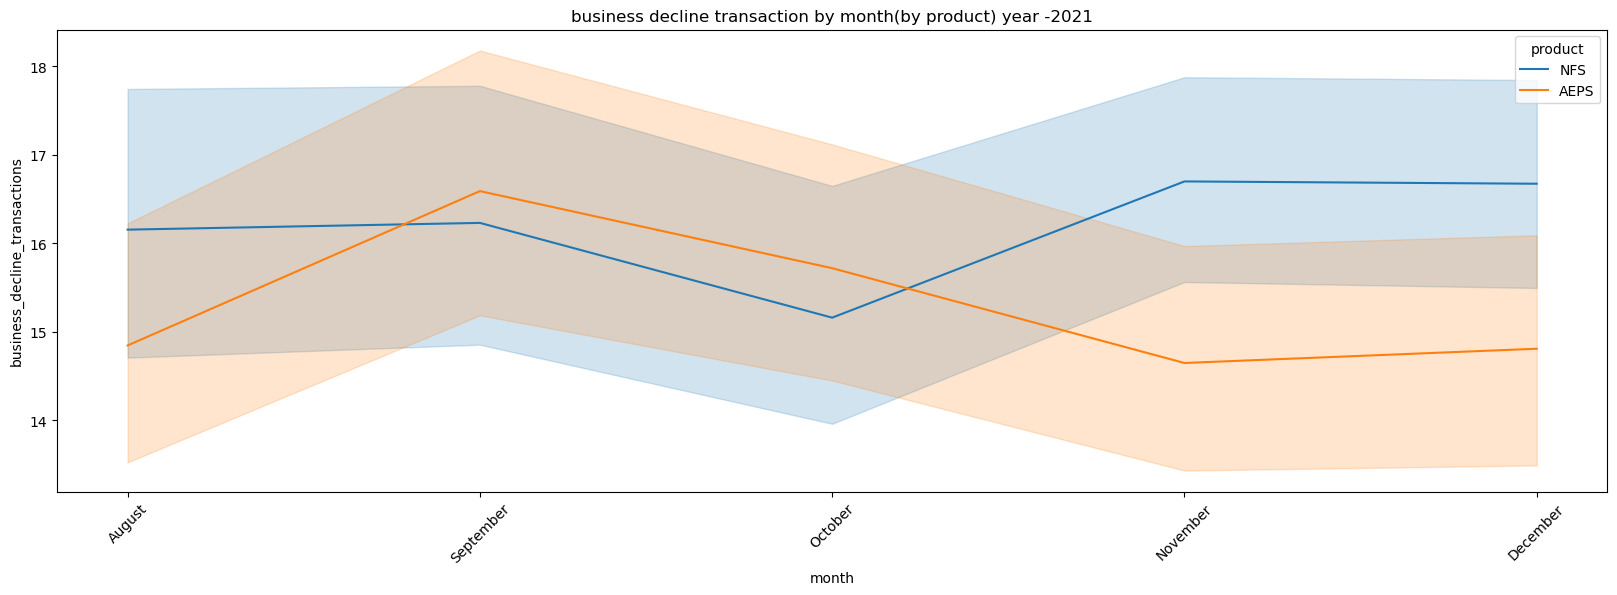

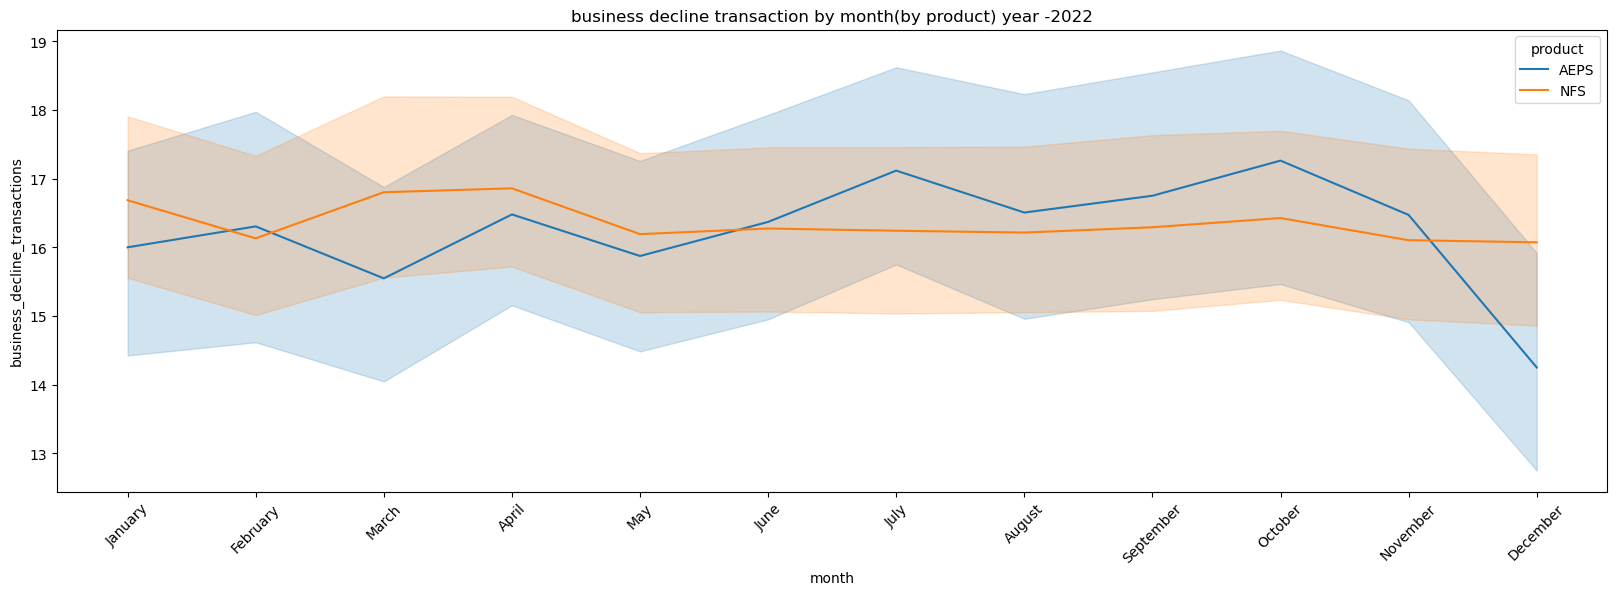

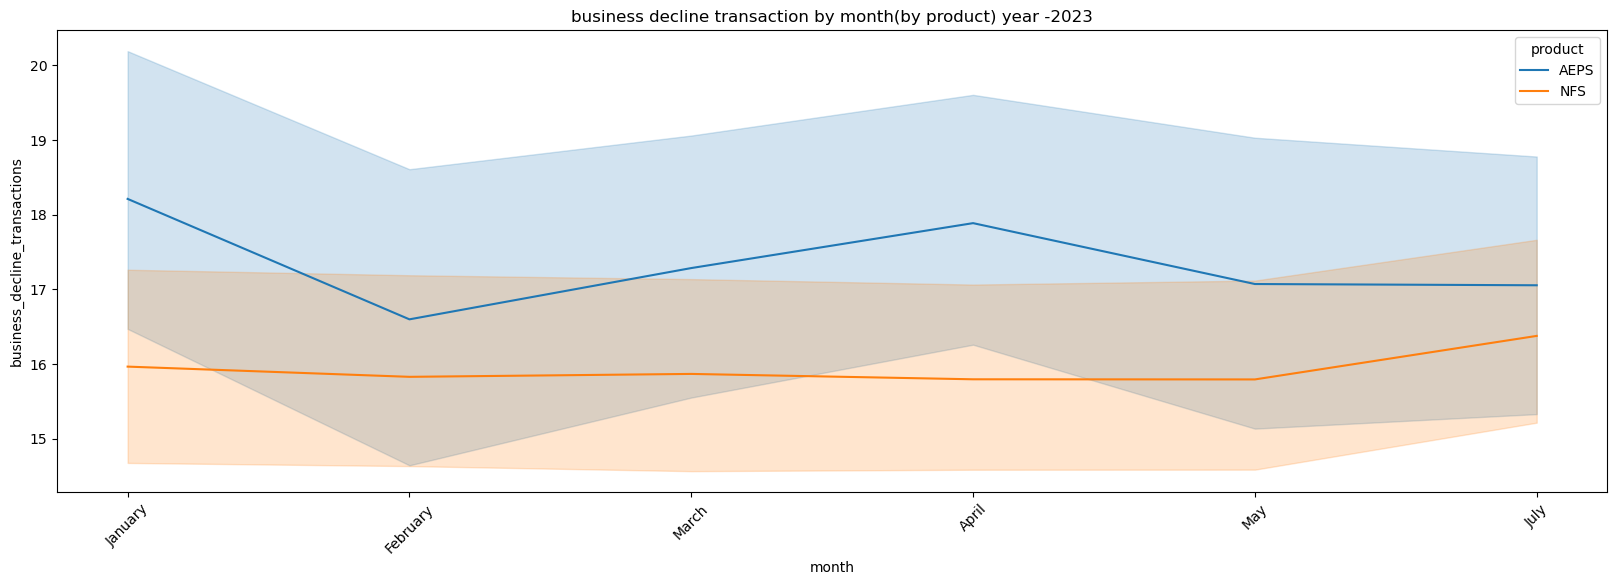

In [154]:
plt.figure(figsize = (20,6))
years_to_include = [2021]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the line chart
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['business_decline_transactions'],
    hue=df_filtered['product'],
    data=df_filtered,    
)
plt.title('business decline transaction by month(by product) year -2021')
plt.xticks(rotation=45)

plt.figure(figsize = (20,6))
years_to_include = [2022]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the line chart
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['business_decline_transactions'],
    hue=df_filtered['product'],
    data=df_filtered,    
)
plt.title('business decline transaction by month(by product) year -2022')
plt.xticks(rotation=45)

plt.figure(figsize = (20,6))
years_to_include = [2023]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the line chart
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['business_decline_transactions'],
    hue=df_filtered['product'],
    data=df_filtered,    
)
plt.title('business decline transaction by month(by product) year -2023')
plt.xticks(rotation=45)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'July')])

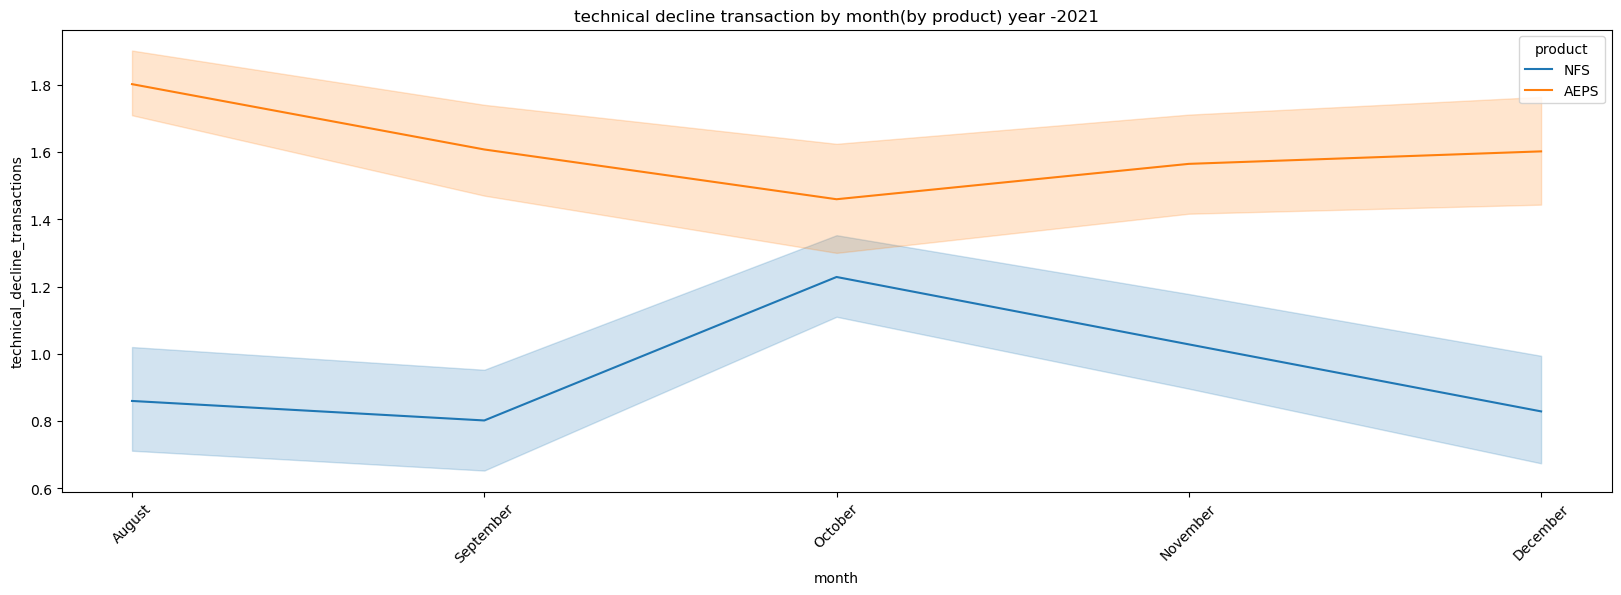

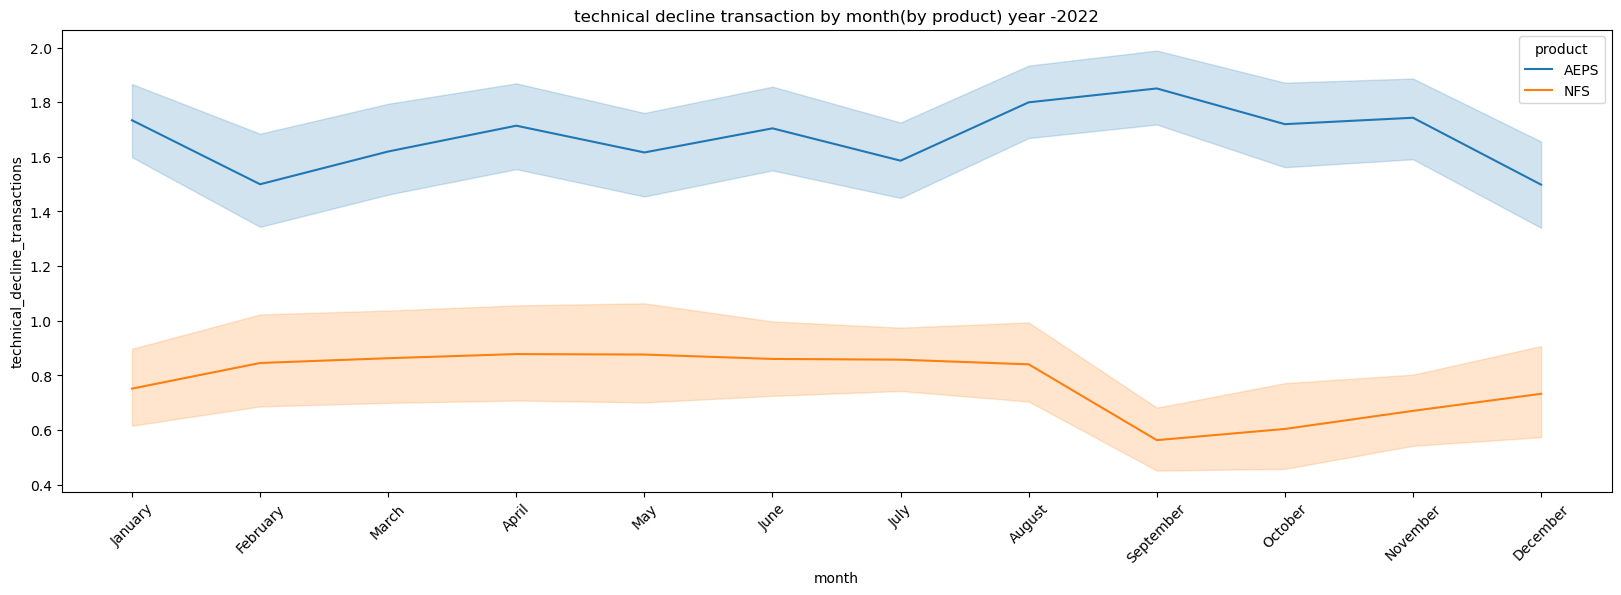

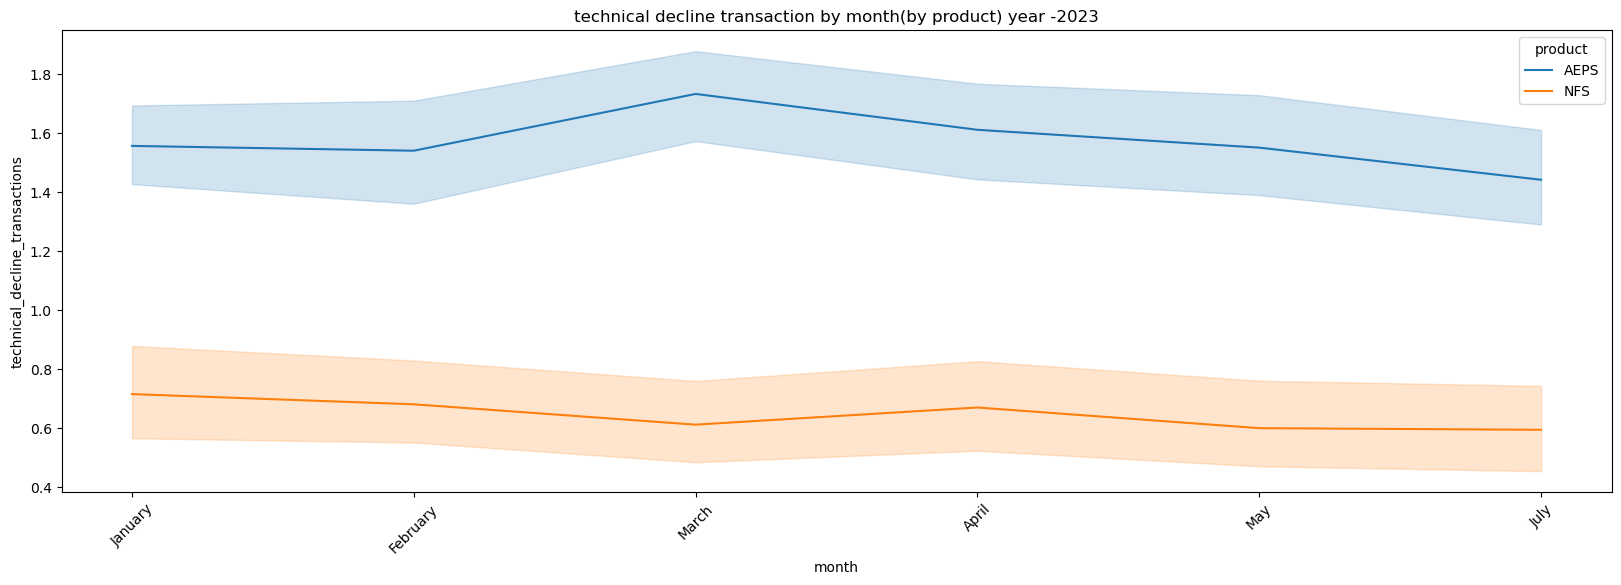

In [155]:
plt.figure(figsize = (20,6))
years_to_include = [2021]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the bar chart
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['technical_decline_transactions'],
    hue=df_filtered['product'],
    data=df_filtered,    
)
plt.title('technical decline transaction by month(by product) year -2021')
plt.xticks(rotation=45)

plt.figure(figsize = (20,6))
years_to_include = [2022]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the bar chart
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['technical_decline_transactions'],
    hue=df_filtered['product'],
    data=df_filtered,    
)
plt.title('technical decline transaction by month(by product) year -2022')
plt.xticks(rotation=45)

plt.figure(figsize = (20,6))
years_to_include = [2023]
df_filtered = df[df['date'].dt.year.isin(years_to_include)]

# Create the bar chart
sns.lineplot(
    x=df_filtered['month'],
    y=df_filtered['technical_decline_transactions'],
    hue=df_filtered['product'],
    data=df_filtered,    
)
plt.title('technical decline transaction by month(by product) year -2023')
plt.xticks(rotation=45)

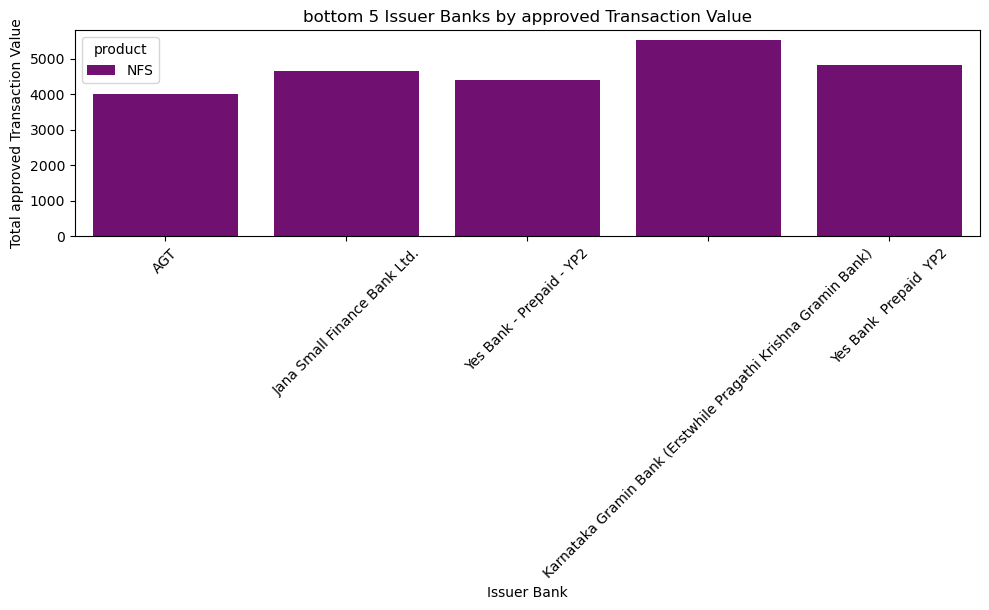

In [121]:
issuer_totals = df.groupby('issuer_bank')['approved_transaction_volume'].sum()

# Sort by value (descending) and select top 5
top_5_issuers = issuer_totals.sort_values(ascending=False).tail(5).index.tolist()

# Filter data for top 5 issuers
df_filtered = df[df['issuer_bank'].isin(top_5_issuers)]

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=df_filtered['issuer_bank'], y=df_filtered['approved_transaction_volume'], hue=df_filtered['product'], data=df_filtered,
            palette=['purple', 'steelblue'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.title("bottom 5 Issuer Banks by approved Transaction Value")
plt.xlabel("Issuer Bank")
plt.ylabel("Total approved Transaction Value")
plt.show()


In [157]:
df.head(20)

,id,date,product,issuer_bank,total_volume,approved_transaction_volume,business_decline_transactions,technical_decline_transactions,month,year
0,0,2021-08-01,NFS,State Bank of India,2.879339,7040.8881,14.68,0.378436,August,2021
72,72,2021-08-01,AEPS,Rajasthan Marudhara Gramin Bank,1.275363,6146.5600,13.55,1.708378,August,2021
71,71,2021-08-01,AEPS,Bangiya Gramin Vikash Bank,1.353255,5544.2916,12.76,2.402430,August,2021
70,70,2021-08-01,AEPS,Bank of Maharashtra,1.371181,6459.3369,12.26,1.488400,August,2021
69,69,2021-08-01,AEPS,Prathma UP Gramin Bank erstwhile Sarva UP Gram...,1.427916,6446.4841,12.57,1.501853,August,2021
68,68,2021-08-01,AEPS,Chhattisgarh Rajya Gramin Bank,1.439835,5368.4929,15.79,2.174752,August,2021
67,67,2021-08-01,AEPS,Madhya Pradesh Gramin Bank erstwhile Narmada J...,1.560248,6325.0209,9.17,2.142416,August,2021
66,66,2021-08-01,AEPS,Indian Overseas Bank,1.609438,7150.3936,8.70,1.432701,August,2021
65,65,2021-08-01,AEPS,Purvanchal Gramin Bank,1.644805,4432.8964,16.34,2.439190,August,2021
64,64,2021-08-01,AEPS,Indian Bank,1.752672,4234.1049,23.99,2.162173,August,2021
